In [1]:
cd ../analysis/

/home/jlee782/segmentation/analysis


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
# from paper_visualizations import * 
from PixelEM import * 
# from test_sample import test_sample_obj
import json

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [30]:
MV = pd.read_csv("../../final_segmentation/analysis/pixel_em/MV_full_PRJ_table.csv")

In [37]:
from withClustAnalysis import *

In [50]:
df = pd.read_csv("pixel_em/MV_PRJ_table.csv")

In [42]:
best_clust_df = pd.read_csv("best_clust_picking.csv")
clustObj=clust_df.objid.unique()
MV = pd.read_csv("../../final_segmentation/analysis/pixel_em/MV_full_PRJ_table.csv") 
MV = filter_best_clust(MV,best_clust_df)
MV = MV[((MV["clust"]==-1) &(MV["objid"].isin(noClust_obj)))| ((MV["clust"]!=-1) & MV["objid"].isin(clustObj))]

In [3]:
from glob import glob

In [117]:
globfnames = glob("greedy_result_*.csv")
greedy_df = pd.read_csv(globfnames[0],index_col=0)
for fname in globfnames:
    greedy_df = greedy_df.append(pd.read_csv(fname,index_col=0))
greedy_df.loc[greedy_df["algo"]=="ground truth","clust"]=-1
greedy_df= greedy_df.reset_index()
greedy_df["num_workers"] = greedy_df["sample"].apply(lambda x: int(x.split("workers")[0]))

In [118]:
withClustMV = pd.read_csv("pixel_em/withClust_MV_PRJ_table.csv",index_col=0)
noClustMV = pd.read_csv("pixel_em/MV_PRJ_table.csv")
noClustMV["clust"]=-1

(0.85, 1)

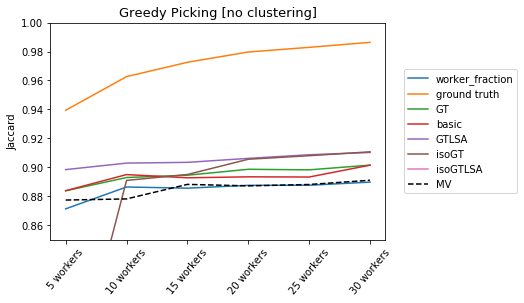

In [120]:
greedy_df_noClust = greedy_df[(greedy_df["clust"]==-1)]
Nworker_performance = greedy_df_noClust.groupby(['algo','num_workers'],as_index=False)[['j']].mean()

for algo in list(set(Nworker_performance["algo"])):
    #if "GTLSA" not in algo:
    plt.plot(np.array(Nworker_performance[Nworker_performance["algo"]==algo][['j']]),label=algo)

MVarr = noClustMV.groupby("num_workers")["MV_jaccard"].mean()
plt.plot(np.array(MVarr),label="MV",color="black",linestyle="--")
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Greedy Picking [no clustering]",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.ylim(0.85,1)

(0.85, 1)

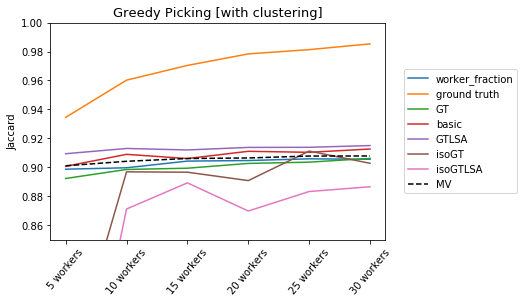

In [114]:
MV = pd.concat([noClustMV,withClustMV])
MV = filter_best_clust(MV,best_clust_df)
greedy_df_withClust = greedy_df[((greedy_df["clust"]==-1) &(greedy_df["objid"].isin(noClust_obj)))| ((greedy_df["clust"]!=-1) & greedy_df["objid"].isin(clustObj))]
MV_df_withClust = MV[((MV["clust"]==-1) &(MV["objid"].isin(noClust_obj)))| ((MV["clust"]!=-1) & MV["objid"].isin(clustObj))]
Nworker_performance = greedy_df_withClust.groupby(['algo','num_workers'],as_index=False)[['j']].mean()

for algo in list(set(Nworker_performance["algo"])):
    #if "GTLSA" not in algo:
    plt.plot(np.array(Nworker_performance[Nworker_performance["algo"]==algo][['j']]),label=algo)

MVarr = MV_df_withClust.groupby("num_workers")["MV_jaccard"].mean()
plt.plot(np.array(MVarr),label="MV",color="black",linestyle="--")
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Greedy Picking [with clustering]",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.ylim(0.85,1)

In [136]:
# Task difficulty
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]
type_one_task_ambiguity = [15,20,22,27,31,40,41,42,47] #wrong object annotation
type_two_task_ambiguity = [1,4,7,8,9,10,18,20,21,25,28,29,30,31,32,33,34,35] #missing region


small_area = [1,15,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]
all_hard_tasks = list(set(np.concatenate((type_one_task_ambiguity,type_two_task_ambiguity))))
easy_tasks = [objid  for objid in object_lst if objid not in all_hard_tasks]

(0.85, 1)

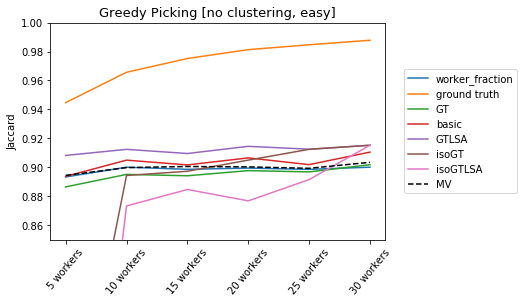

In [137]:
greedy_df_noClust = greedy_df[(greedy_df["clust"]==-1)]
greedy_df_noClust = greedy_df_noClust[greedy_df_noClust["objid"].isin(easy_tasks)]
Nworker_performance = greedy_df_noClust.groupby(['algo','num_workers'],as_index=False)[['j']].mean()

for algo in list(set(Nworker_performance["algo"])):
    #if "GTLSA" not in algo:
    plt.plot(np.array(Nworker_performance[Nworker_performance["algo"]==algo][['j']]),label=algo)
noClustMV = pd.read_csv("pixel_em/MV_PRJ_table.csv")
noClustMV["clust"]=-1
noClustMV = noClustMV[noClustMV["objid"].isin(easy_tasks)]
MVarr = noClustMV.groupby("num_workers")["MV_jaccard"].mean()
plt.plot(np.array(MVarr),label="MV",color="black",linestyle="--")
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Greedy Picking [no clustering, easy]",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.ylim(0.85,1)

(0.85, 1)

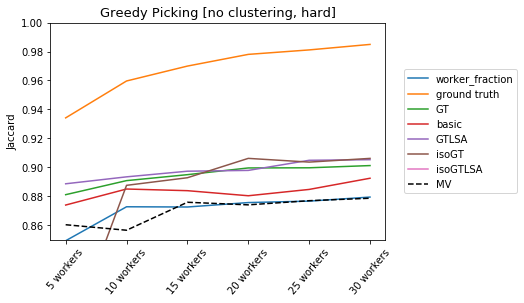

In [138]:
greedy_df_noClust = greedy_df[(greedy_df["clust"]==-1)]
greedy_df_noClust = greedy_df_noClust[greedy_df_noClust["objid"].isin(all_hard_tasks)]
Nworker_performance = greedy_df_noClust.groupby(['algo','num_workers'],as_index=False)[['j']].mean()

for algo in list(set(Nworker_performance["algo"])):
    #if "GTLSA" not in algo:
    plt.plot(np.array(Nworker_performance[Nworker_performance["algo"]==algo][['j']]),label=algo)
noClustMV = pd.read_csv("pixel_em/MV_PRJ_table.csv")
noClustMV["clust"]=-1
noClustMV = noClustMV[noClustMV["objid"].isin(all_hard_tasks)]
MVarr = noClustMV.groupby("num_workers")["MV_jaccard"].mean()
plt.plot(np.array(MVarr),label="MV",color="black",linestyle="--")
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Greedy Picking [no clustering, hard]",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.ylim(0.85,1)

(0.85, 1)

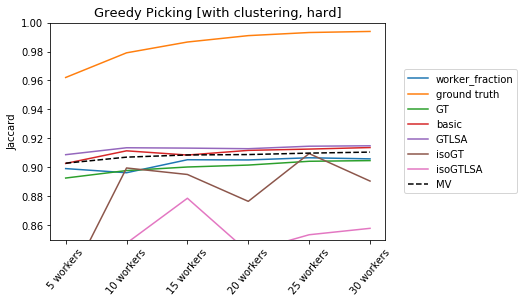

In [139]:
MV = pd.concat([noClustMV,withClustMV])
MV = filter_best_clust(MV,best_clust_df)
greedy_df_withClust = greedy_df[((greedy_df["clust"]==-1) &(greedy_df["objid"].isin(noClust_obj)))| ((greedy_df["clust"]!=-1) & greedy_df["objid"].isin(clustObj))]
greedy_df_withClust = greedy_df_withClust[greedy_df_withClust["objid"].isin(all_hard_tasks)]
MV_df_withClust = MV[((MV["clust"]==-1) &(MV["objid"].isin(noClust_obj)))| ((MV["clust"]!=-1) & MV["objid"].isin(clustObj))]
MV_df_withClust = MV_df_withClust[MV_df_withClust["objid"].isin(all_hard_tasks)]
Nworker_performance = greedy_df_withClust.groupby(['algo','num_workers'],as_index=False)[['j']].mean()

for algo in list(set(Nworker_performance["algo"])):
    #if "GTLSA" not in algo:
    plt.plot(np.array(Nworker_performance[Nworker_performance["algo"]==algo][['j']]),label=algo)

MVarr = MV_df_withClust.groupby("num_workers")["MV_jaccard"].mean()
plt.plot(np.array(MVarr),label="MV",color="black",linestyle="--")
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Greedy Picking [with clustering, hard]",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.ylim(0.85,1)

(0.85, 1)

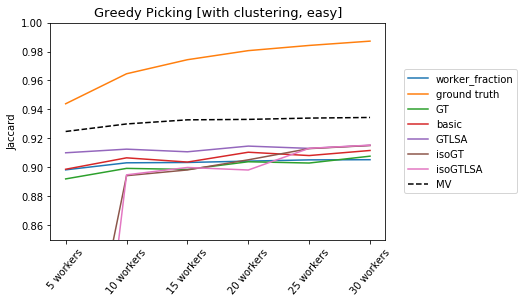

In [140]:
MV = pd.concat([noClustMV,withClustMV])
MV = filter_best_clust(MV,best_clust_df)
greedy_df_withClust = greedy_df[((greedy_df["clust"]==-1) &(greedy_df["objid"].isin(noClust_obj)))| ((greedy_df["clust"]!=-1) & greedy_df["objid"].isin(clustObj))]
greedy_df_withClust = greedy_df_withClust[greedy_df_withClust["objid"].isin(easy_tasks)]
MV_df_withClust = MV[((MV["clust"]==-1) &(MV["objid"].isin(noClust_obj)))| ((MV["clust"]!=-1) & MV["objid"].isin(clustObj))]
MV_df_withClust = MV_df_withClust[MV_df_withClust["objid"].isin(easy_tasks)]
Nworker_performance = greedy_df_withClust.groupby(['algo','num_workers'],as_index=False)[['j']].mean()

for algo in list(set(Nworker_performance["algo"])):
    #if "GTLSA" not in algo:
    plt.plot(np.array(Nworker_performance[Nworker_performance["algo"]==algo][['j']]),label=algo)

MVarr = MV_df_withClust.groupby("num_workers")["MV_jaccard"].mean()
plt.plot(np.array(MVarr),label="MV",color="black",linestyle="--")
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Greedy Picking [with clustering, easy]",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.ylim(0.85,1)